**UK_Flight_Data Statistics_2018**

**Exploratory Analysis**

To begin this exploratory analysis, first use matplotlib to import libraries and define functions for plotting the data. Depending on the data, not all plots will be made. 

**Importing libraries**

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

**Defining a function for the disribution plots**

In [2]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

**Creating a function for correlation matrix**

In [3]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

**Creating a function for scatter and density plots**

In [4]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

**Now you're ready to read in the data and use the plotting functions to visualize the data.**

**Loading the data and reading it to a dataframe**

In [5]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# 201801_Punctuality_Statistics_Full_Analysis.csv has 3208 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('201801_Punctuality_Statistics_Full_Analysis.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = '201801_Punctuality_Statistics_Full_Analysis.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 25 columns


Let's take a quick look at what the data looks like:

In [6]:
df1.head(5)

,run_date,reporting_period,reporting_airport,origin_destination_country,origin_destination,airline_name,scheduled_charter,number_flights_matched,actual_flights_unmatched,number_flights_cancelled,...,flights_between_61_and_120_minutes_late_percent,flights_between_121_and_180_minutes_late_percent,flights_between_181_and_360_minutes_late_percent,flights_more_than_360_minutes_late_percent,flights_unmatched_percent,flights_cancelled_percent,average_delay_mins,previous_year_month_flights_matched,previous_year_month_early_to_15_mins_late_percent,previous_year_month_average_delay
0,30/04/2018 13:48,201801,ABERDEEN,POLAND,GDANSK,WIZZ AIR,S,18,0,2,...,0.000000,5.000000,0.000000,0.0,0.0,10.000000,11.000000,19,63.157895,33.736842
1,30/04/2018 13:48,201801,ABERDEEN,POLAND,WARSAW (CHOPIN),WIZZ AIR,S,12,0,0,...,8.333333,0.000000,0.000000,0.0,0.0,0.000000,21.583333,18,83.333333,7.055556
2,30/04/2018 13:48,201801,ABERDEEN,UNITED KINGDOM,BELFAST CITY (GEORGE BEST),FLYBE LTD,S,60,0,2,...,1.612903,0.000000,0.000000,0.0,0.0,3.225806,5.683333,62,82.258065,12.161290
3,30/04/2018 13:48,201801,ABERDEEN,UNITED KINGDOM,BIRMINGHAM,FLYBE LTD,S,145,0,1,...,2.054795,0.000000,0.000000,0.0,0.0,0.684932,4.000000,176,81.818182,14.835227
4,30/04/2018 13:48,201801,ABERDEEN,UNITED KINGDOM,BRISTOL,BMI REGIONAL,S,57,0,2,...,11.864407,1.694915,1.694915,0.0,0.0,3.389831,23.403509,65,80.000000,22.384615


**Distribution graphs (histogram/bar graph) of sampled columns:**

<ipython-input-2-0121bf3d9d74>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-2-0121bf3d9d74>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-2-0121bf3d9d74>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


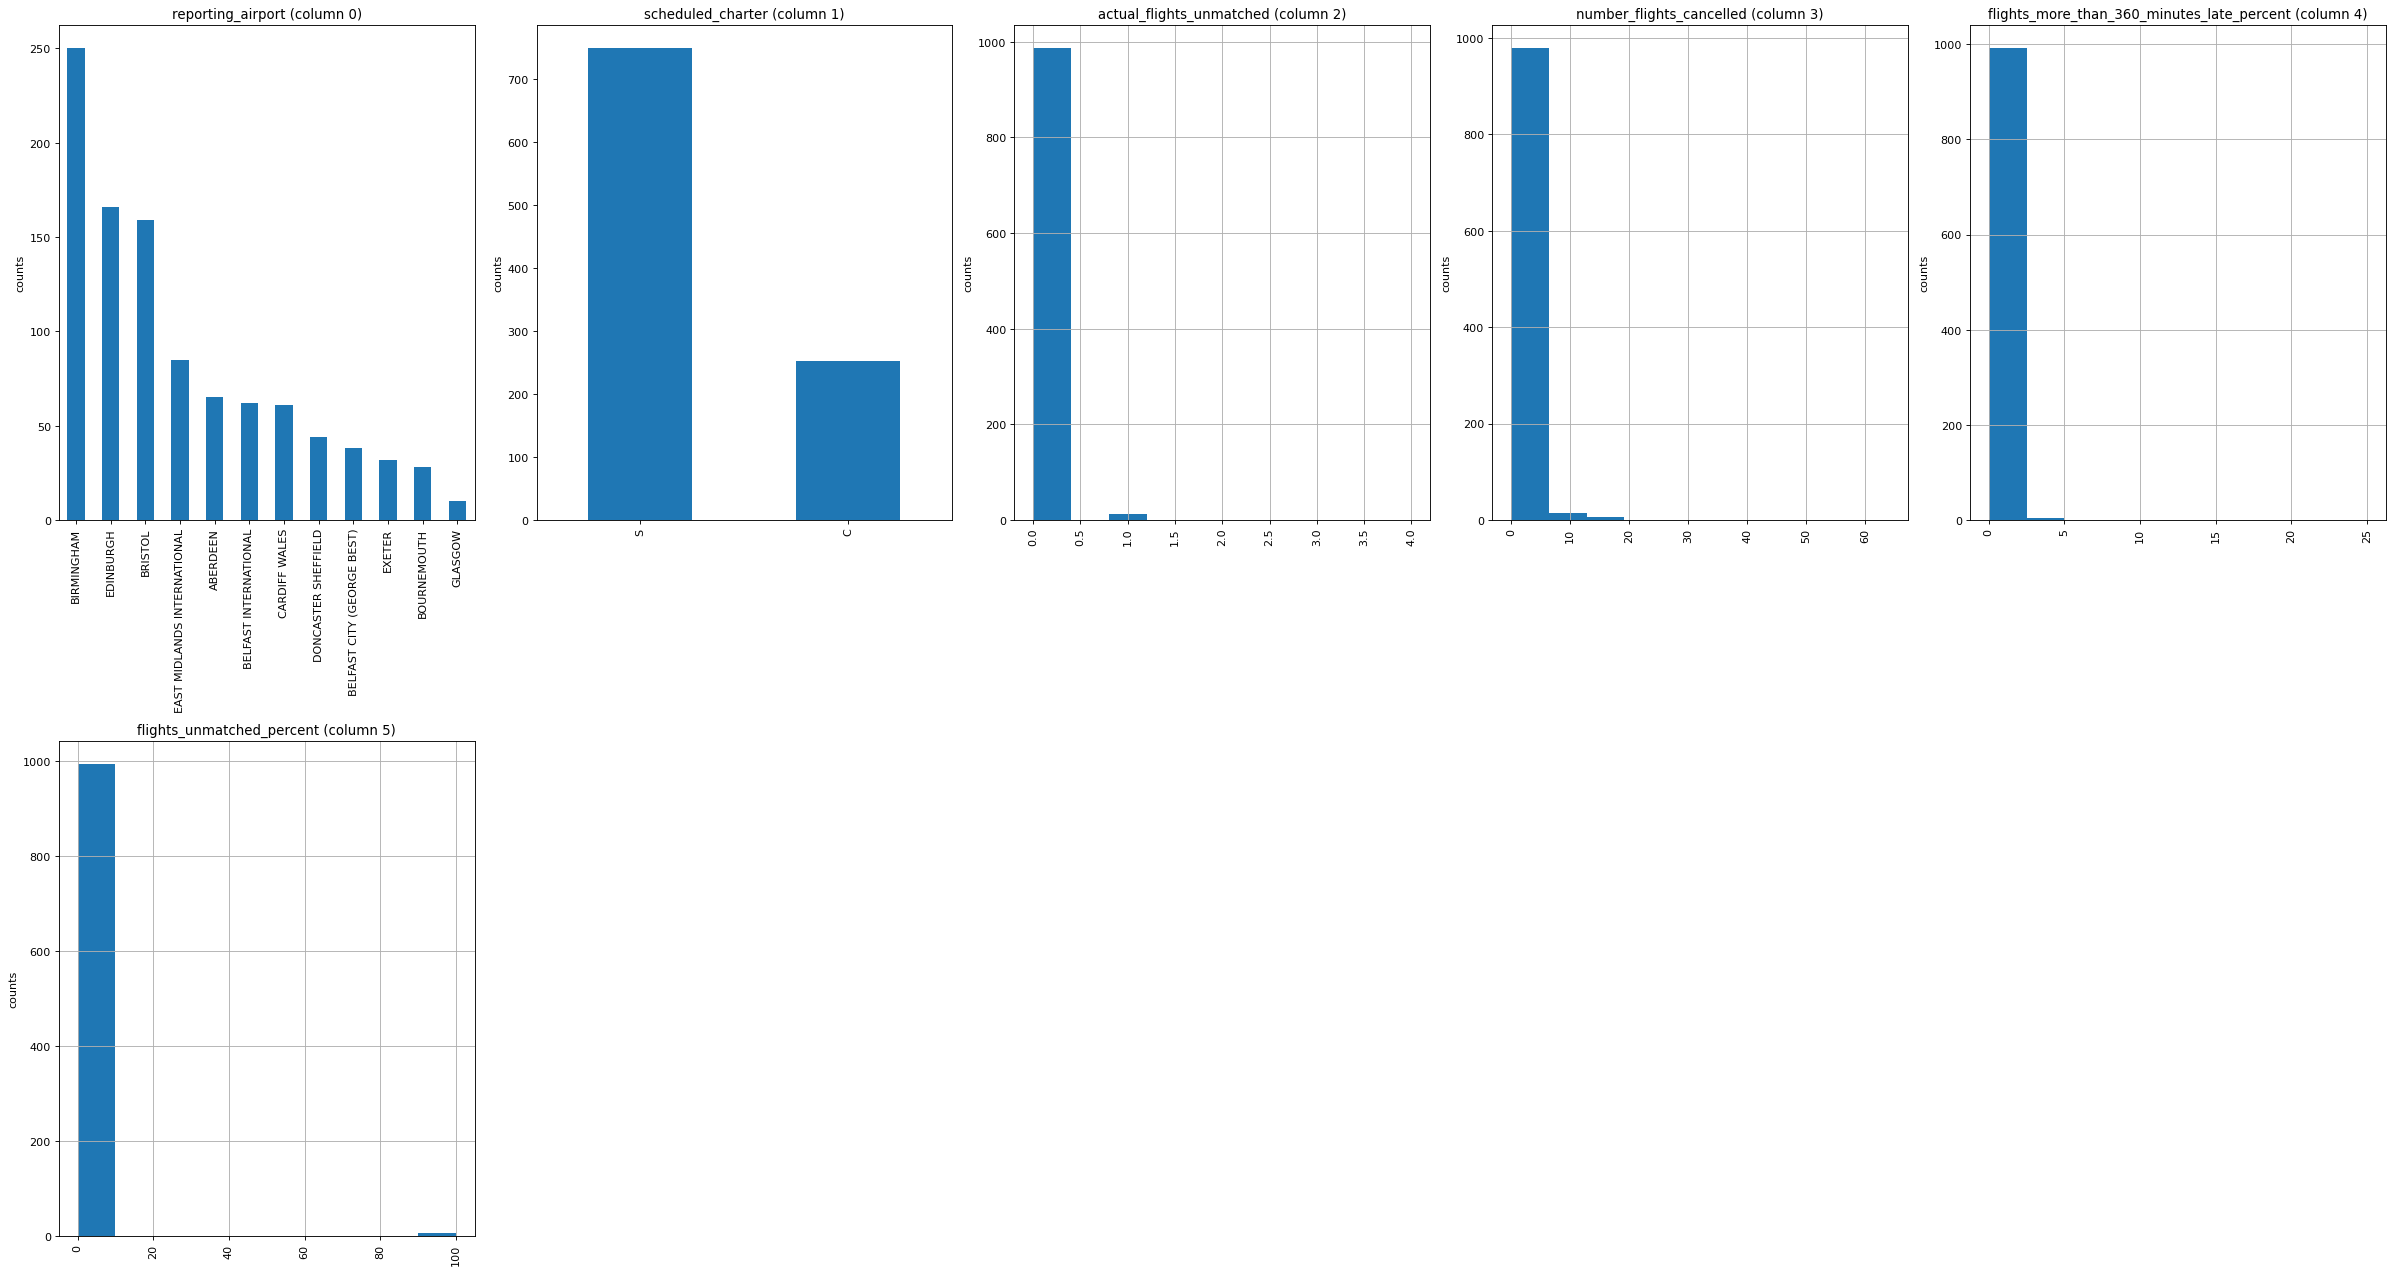

In [7]:
plotPerColumnDistribution(df1, 10, 5)

**Visual of Correlation matrix:**

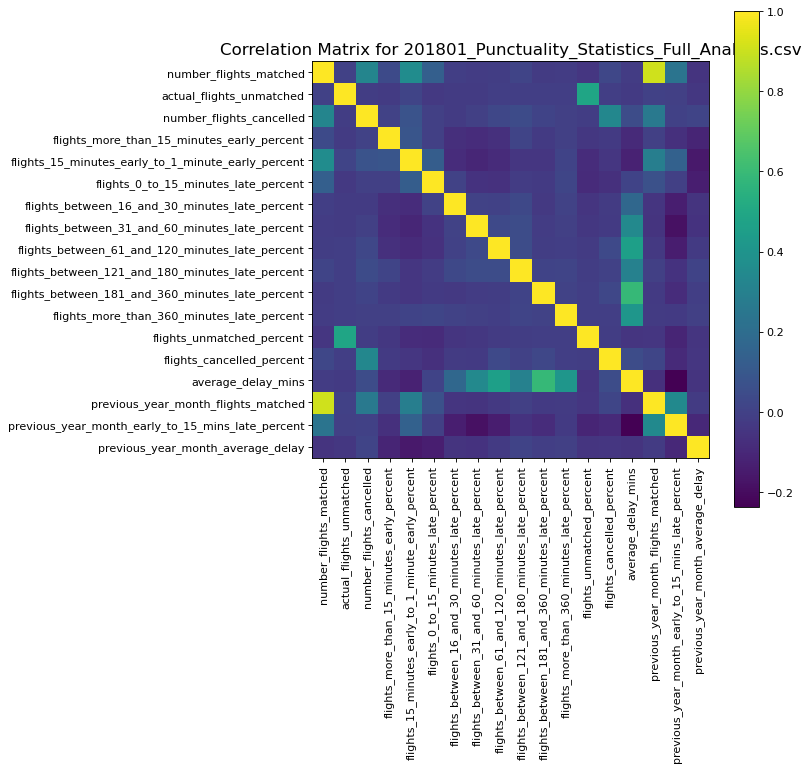

In [8]:
plotCorrelationMatrix(df1, 8)

**Visual for Scatter and density plots:**

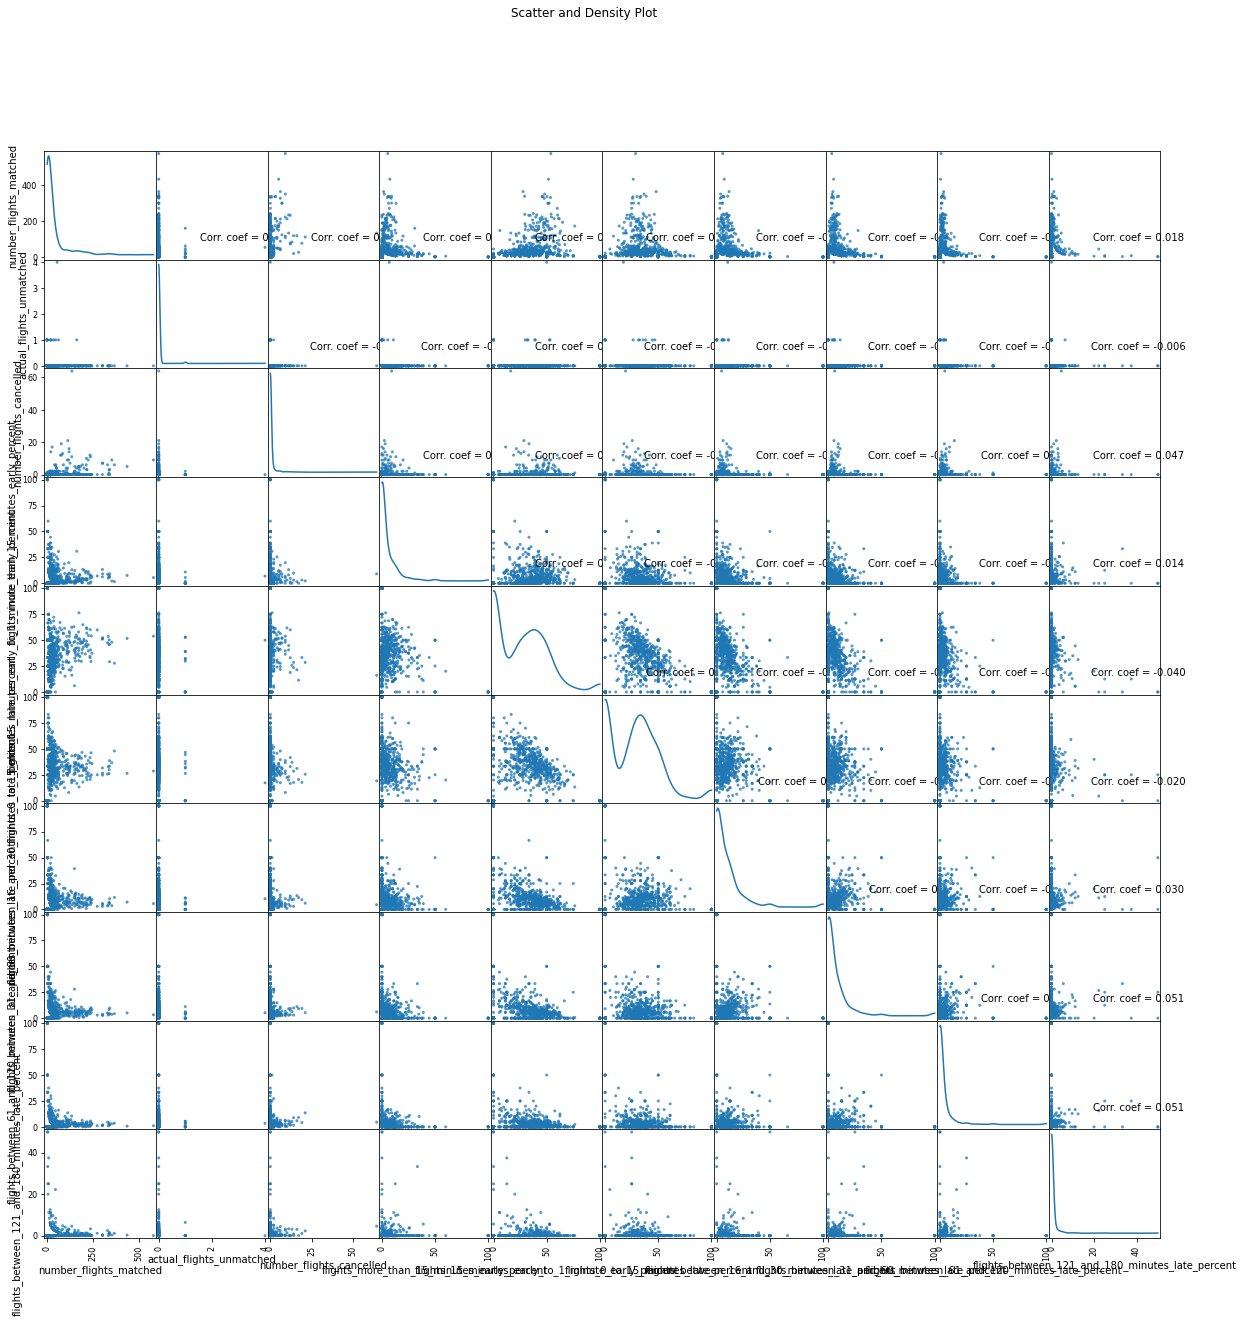

In [9]:
plotScatterMatrix(df1, 20, 10)